In [2]:
import cv2
import cv2 as cv
import numpy as np
import pytesseract
from PIL import Image
import os
from IPython.display import Image as display_image
import imutils

In [3]:
# load images
source_dir = "images/"
source_images = list(map(lambda x: source_dir+x,sorted(os.listdir(source_dir))[1:]))
source_images

["images/1 | #03# + Paladin + The Emperor's New Gun | Endurian.jpg",
 "images/10 | #03# + Rouge + The Emperor's New Gun | Potassium.jpg",
 'images/11 | #03# + assassin + extra crown | NMH0518.jpg',
 'images/12 | #03# + Priest + Extra Crown | ID497990333.jpg',
 'images/13 | #03# + Priest + Exstra Crown. | ID513916359.jpg',
 'images/14 | #03# + Robot + Extra crown | 🍊апельсин.jpg',
 "images/15 | #03# + Paladin + The New Emperor's Gun | Waxlight.jpg",
 "images/2 | #03# Rogue + grand knight | MELODUPA 'ᴗ'.jpg",
 "images/3 | #03# + Rogue + The Emperor's New Gun | ☃️werewolfisbadguy☃️.jpg",
 'images/4 | #03#+robot+extra crown | Nvm [A.U.T.S](#SUBPewDiePie).jpg',
 "images/5 | #03# + Asassin + The Emperor's New Gun | DragonSlayer71.jpg",
 "images/6 | #3# + Assassin + The Emperor's New Gun | ❄Rusacov❄.jpg",
 "images/7 | #03# + Knight + The Emperor's New Gun | WizArd.jpg",
 'images/8 | #03#+assassin+extra crown | саша пошигорев.jpg',
 "images/9 | #3#+Robot+The New Emperor's Gun | ID488442681.jpg

In [73]:
# sample image
ind=3
display_image(source_images[ind])
original = Image.open(source_images[ind])
w, h = original.size
cropped = original.crop((w*0.7, h*0, w*0.9, h*0.2))
#cropped.show()
cropped.save("cropped.jpg")

# try to turn all areas that are not white to white, and the original white area to black
cropped = cropped.convert("RGB")
data = np.array(cropped)
red, green, blue = data.T

threshold = 200
white_areas = (red > threshold) & (blue > threshold) & (green > threshold)
data[:,:,:][white_areas.T] = (0, 0, 0)
data[:,:,:][np.invert(white_areas.T)] = (255,255,255)

im2 = Image.fromarray(data)
#im2.show()

im2.save("processed.jpg")

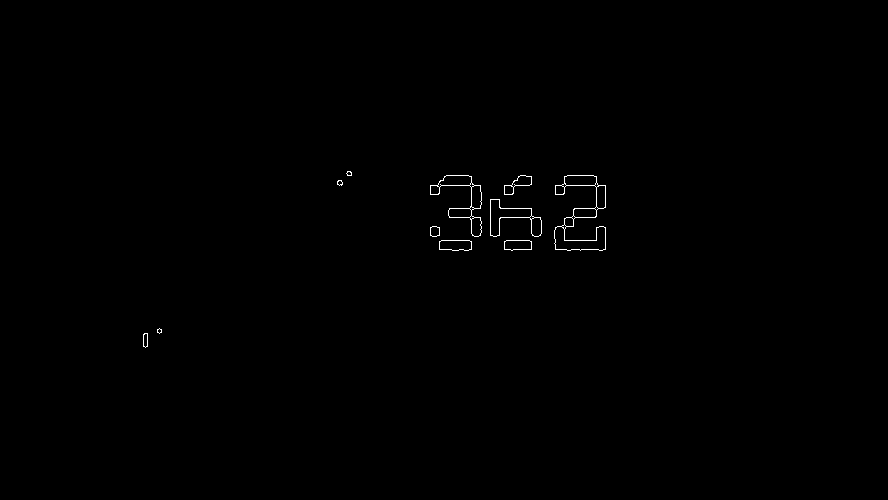

In [74]:
# load the example image
image = cv2.imread("processed.jpg")

# pre-process the image by resizing it, converting it to
# graycale, blurring it, and computing an edge map
image = imutils.resize(image, height=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 200, 255)

cv2.imwrite("edged.png", edged)
display_image('edged.png')

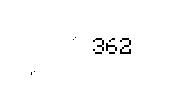

In [75]:
im = cv2.imread('processed.jpg')
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
contours,hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
idx =0 
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    roi=im[y:y+h,x:x+w]
    #cv2.imwrite(str(idx) + '.jpg', roi)
    #cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
cv2.imwrite('bounded.png',im)
display_image('bounded.png')

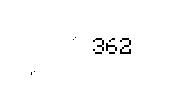

In [76]:
# find contours in the thresholded image, then initialize the
# digit contours lists
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
cnts,hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
digitCnts = []

# loop over the digit area candidates
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)

    # if the contour is sufficiently large, it must be a digit
    if w >= 5 and (h >= 5 and h <= 40):
        digitCnts.append(c)
        cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
cv2.imwrite('bounded.png',im)
display_image('bounded.png')

In [85]:
def get_string(img_path):
    # Read image with opencv
    img = cv2.imread(img_path)

    # Convert to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    # Write image after removed noise
    cv2.imwrite("removed_noise.png", img)

    #  Apply threshold to get image with only black and white
    #img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

    # Write the image after apply opencv to do some ...
    cv2.imwrite("thres.png", img)

    # Recognize text with tesseract for python
    result = pytesseract.image_to_string(Image.open("thres.png"), config='outputbase digits')

    # Remove template file
    #os.remove(temp)

    return result

In [86]:
get_string("processed.jpg")

'no\n\ntm'